In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import layout, row
from bokeh.models import ColumnDataSource, RangeTool, HoverTool
output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv("./data/modified_MSFT.csv",parse_dates=["Date"])

In [4]:
hover_tool = HoverTool(
                tooltips=[
                    ( 'date',   '@date{%F}'            ),
                    ( 'close',  '$@{close}{0.2f}' ), # use @{ } for field names with spaces
                ],

                formatters={
                    '@date'        : 'datetime', # use 'datetime' formatter for '@date' field
                    '@{adj close}' : 'printf',   # use 'printf' formatter for '@{adj close}' field
                                                 # use default 'numeral' formatter for other fields
                },

                # display a tooltip whenever the cursor is vertically in line with a glyph
                mode='vline'
            )


In [5]:
close = ColumnDataSource(data=dict(date=df["Date"], close=df['Close']))

p = figure(title="MSFT Close", plot_height=300, plot_width=900, tools="xpan", toolbar_location=None,
           x_axis_type="datetime",background_fill_color="#efefef", x_range=(df["Date"].iloc[0], df["Date"].iloc[-1]))

p.line('date', 'close', source=close)
p.yaxis.axis_label = 'Price'
p.add_tools(hover_tool)

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select = figure(plot_height=130, plot_width=900, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

select.line('date', 'close', source=close)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

show(column(p, select))

In [6]:
hover_tool2 = HoverTool(
                tooltips=[
                    ( 'date',   '@date{%F}'            ),
                    ( 'close',  '@{close}' ), # use @{ } for field names with spaces
                ],

                formatters={
                    '@date'        : 'datetime', # use 'datetime' formatter for '@date' field
                    '@{adj close}' : 'printf',   # use 'printf' formatter for '@{adj close}' field
                                                 # use default 'numeral' formatter for other fields
                },

                # display a tooltip whenever the cursor is vertically in line with a glyph
                mode='vline'
            )


In [7]:
close_change = ColumnDataSource(data=dict(date=df["Date"], close=df['Close_change']))

p = figure(title="MSFT Close Change", plot_height=300, plot_width=900, tools="xpan", toolbar_location=None,
           x_axis_type="datetime",background_fill_color="#efefef", x_range=(df["Date"].iloc[0], df["Date"].iloc[-1]))

p.line('date', 'close', source=close_change)
p.yaxis.axis_label = 'Price'
p.add_tools(hover_tool2)

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select = figure(plot_height=130, plot_width=900, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

select.line('date', 'close', source=close_change)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

show(column(p, select))

Text(0.5, 1.0, 'Correlation Heatmap')

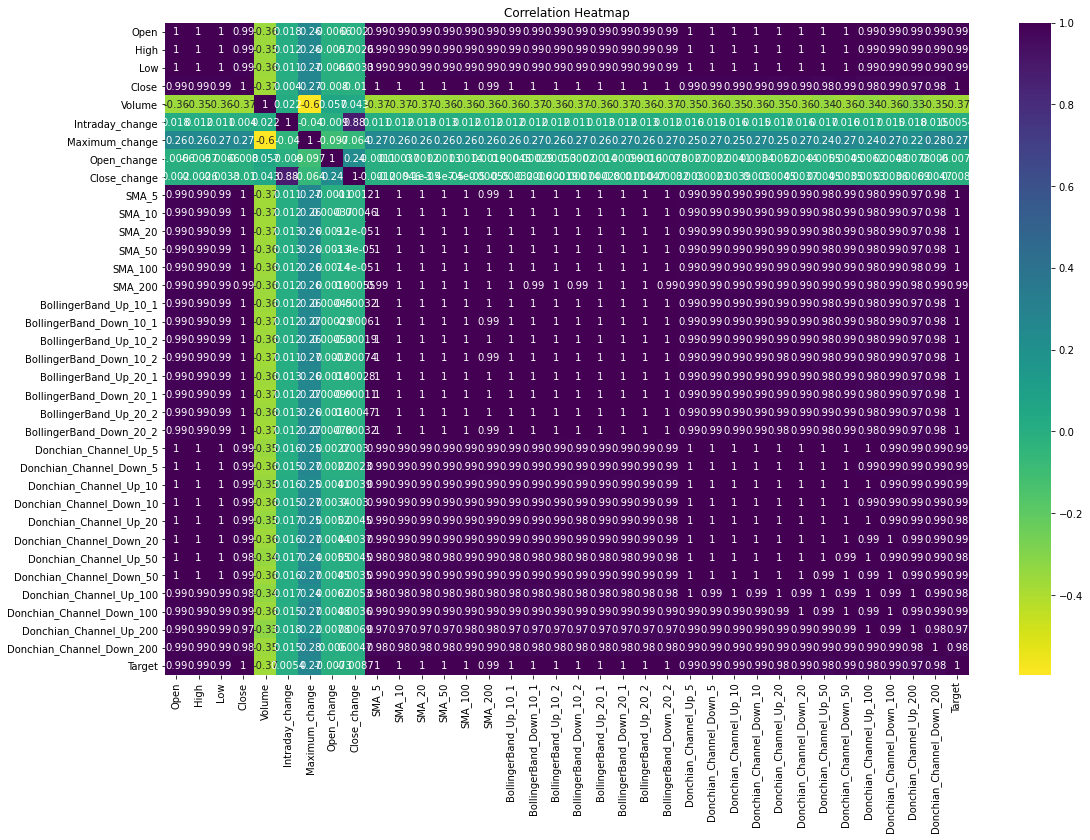

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = True, cmap = "viridis_r")
plt.title("Correlation Heatmap")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C867A5190>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

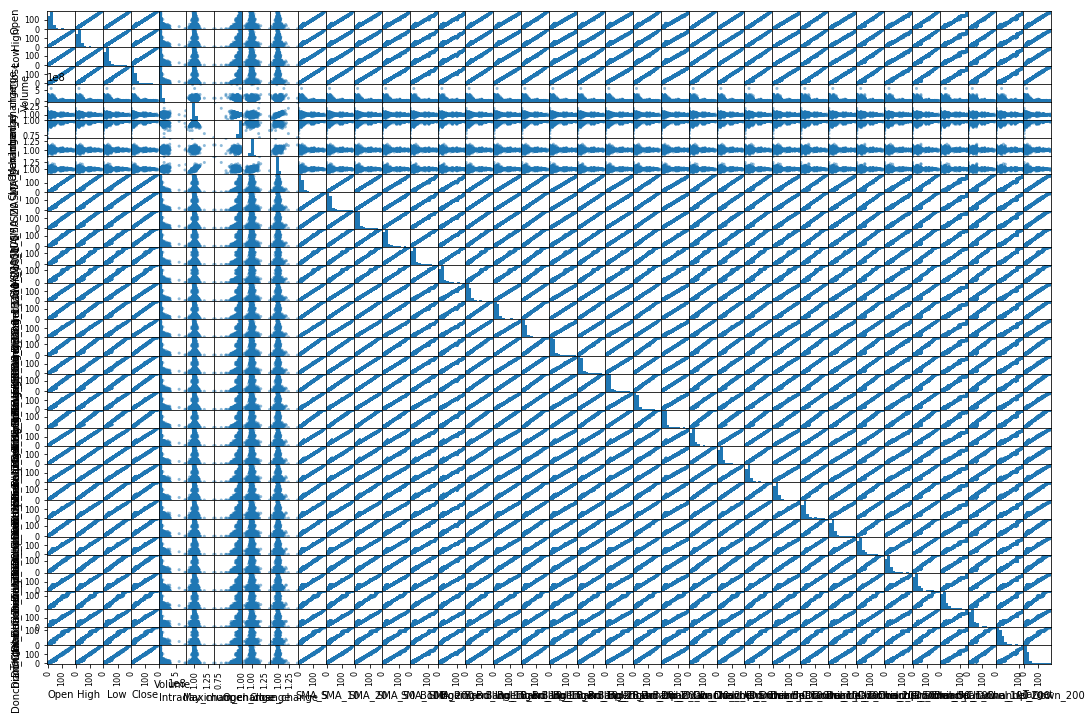

In [15]:
pd.plotting.scatter_matrix(df[df.columns.values], figsize=(18,12))